In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
file_cctv = '../Reference/data/01. CCTV_in_Seoul.csv'

In [61]:
CCTV_Seoul = pd.read_csv(file_cctv, encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [62]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [63]:
CCTV_Seoul.columns[0]

'기관명'

In [64]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [65]:
file_pop = '../Reference/data/01. population_in_Seoul.xls'

# parse_cols 없어짐
#xlrd 설치  필요
# rename 안 사용

pop_Seoul = pd.read_excel(file_pop,
                         header = 2,
                         ## parse_cols = 'B, D, G, J, N',
                         usecols = 'B, D, G, J, N',
                         names = ['구별', '인구수', '한국인', '외국인', '고령자'])

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 1-3 pandas 기초 익히기

In [66]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [67]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [68]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2013-01-01,2.435129,0.868928,-0.930030,0.500698
2013-01-02,2.030528,-0.179279,0.372927,0.034417
2013-01-03,1.030496,-0.131030,1.179181,1.549914
2013-01-04,0.265066,-0.002538,2.160097,0.225397
2013-01-05,1.331217,-1.414524,-0.038541,-1.743180
2013-01-06,-0.531905,0.623507,-0.039483,-1.071408


In [69]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [70]:
df.values

array([[ 2.43512905,  0.86892821, -0.93003004,  0.50069838],
       [ 2.03052841, -0.1792793 ,  0.37292743,  0.03441722],
       [ 1.03049617, -0.13103039,  1.17918103,  1.54991353],
       [ 0.26506597, -0.00253752,  2.16009716,  0.22539716],
       [ 1.33121733, -1.41452435, -0.03854112, -1.74318017],
       [-0.53190506,  0.62350652, -0.03948325, -1.07140799]])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [72]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,1.093422,-0.039156,0.450692,-0.084027
std,1.101518,0.798097,1.081187,1.170397
min,-0.531905,-1.414524,-0.930030,-1.743180
25%,0.456424,-0.167217,-0.039248,-0.794952
50%,1.180857,-0.066784,0.167193,0.129907
75%,1.855701,0.466996,0.977618,0.431873
max,2.435129,0.868928,2.160097,1.549914


In [73]:
df.loc[dates[0]]

A    2.435129
B    0.868928
C   -0.930030
D    0.500698
Name: 2013-01-01 00:00:00, dtype: float64

In [74]:
df.loc[:, ['A','B']]

,A,B
2013-01-01,2.435129,0.868928
2013-01-02,2.030528,-0.179279
2013-01-03,1.030496,-0.131030
2013-01-04,0.265066,-0.002538
2013-01-05,1.331217,-1.414524
2013-01-06,-0.531905,0.623507


In [75]:
df.loc['20130102', ['A', 'B']]

A    2.030528
B   -0.179279
Name: 2013-01-02 00:00:00, dtype: float64

In [76]:
df.iloc[3]

A    0.265066
B   -0.002538
C    2.160097
D    0.225397
Name: 2013-01-04 00:00:00, dtype: float64

In [77]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,2.030528,0.372927
2013-01-03,1.030496,1.179181
2013-01-05,1.331217,-0.038541


In [78]:
df[df.A > 0]

,A,B,C,D
2013-01-01,2.435129,0.868928,-0.930030,0.500698
2013-01-02,2.030528,-0.179279,0.372927,0.034417
2013-01-03,1.030496,-0.131030,1.179181,1.549914
2013-01-04,0.265066,-0.002538,2.160097,0.225397
2013-01-05,1.331217,-1.414524,-0.038541,-1.743180


In [79]:
df.loc[df.A > 0]

,A,B,C,D
2013-01-01,2.435129,0.868928,-0.930030,0.500698
2013-01-02,2.030528,-0.179279,0.372927,0.034417
2013-01-03,1.030496,-0.131030,1.179181,1.549914
2013-01-04,0.265066,-0.002538,2.160097,0.225397
2013-01-05,1.331217,-1.414524,-0.038541,-1.743180


In [80]:
df[df > 0]

,A,B,C,D
2013-01-01,2.435129,0.868928,NaN,0.500698
2013-01-02,2.030528,NaN,0.372927,0.034417
2013-01-03,1.030496,NaN,1.179181,1.549914
2013-01-04,0.265066,NaN,2.160097,0.225397
2013-01-05,1.331217,NaN,NaN,NaN
2013-01-06,NaN,0.623507,NaN,NaN


In [81]:
df.loc[df > 0]

ValueError: Cannot index with multidimensional key

# 1-4 pandas 이용해서 CCTV와 인구현황 데이터 파악하기

In [ ]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

In [ ]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

In [ ]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100

CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

In [ ]:
pop_Seoul.drop([0], inplace=True)

pop_Seoul['구별'].unique()

In [82]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [83]:
pop_Seoul.drop([26], inplace=True)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [84]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


# 1-5 pandas 고급기능 - 두 DataFrame 병합하기

In [85]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

result = pd.concat([df1, df2, df3])

result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [86]:
result = pd.concat([df1, df2, df3], keys = ['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [87]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [88]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])


result = pd.concat([df1, df4], axis=1)

result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [89]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [90]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [91]:
result = pd.concat([df1, df4], axis=1, join='inner')

result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [92]:
# join_axes 파라미터 없어짐
# result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result = pd.concat([df1, df4], axis=1, join='outer').loc[df1.index]
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [93]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [94]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [95]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [96]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [97]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [98]:
pd.merge(left, right, on='key', how='left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [99]:
pd.merge(left, right, on='key', how='right')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [100]:
pd.merge(left, right, on='key', how='outer')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [101]:
pd.merge(left, right, on='key', how='inner')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


# 1-6 CCTV 데이터와 인구현황 데이터를 합치고 분석하기

In [102]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [103]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [104]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [105]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [106]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [107]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [108]:
data_result.sort_values(by='소계', ascending=False).head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [109]:
data_result.sort_values(by='인구수', ascending=False).head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
송파구,618,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 1-7 파이썬의 대표 시각화 도구 - Matplotlib

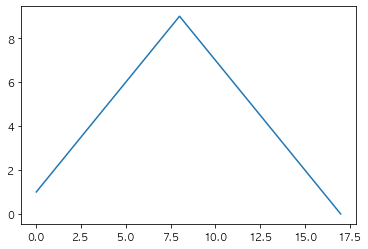

In [110]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [111]:
t = np.arange(0,12,0.01)
y = np.sin(t)

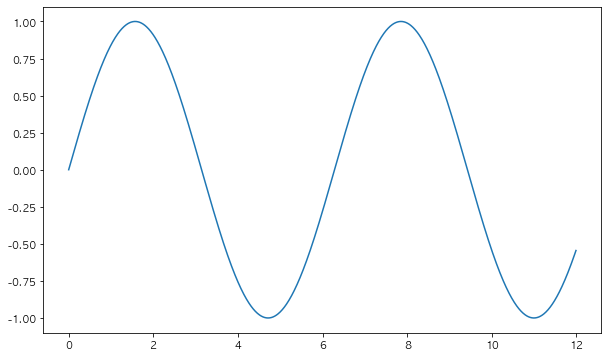

In [112]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.show()

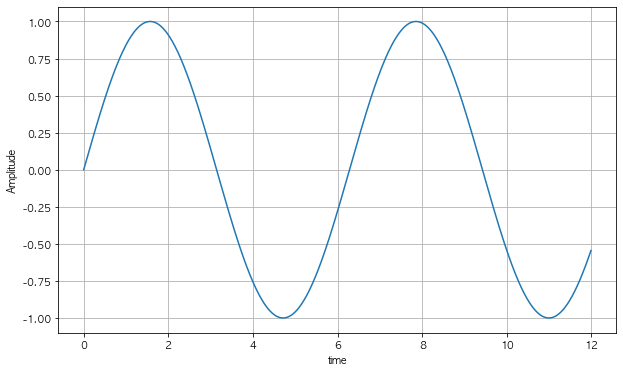

In [113]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid() # 그리드 적용하기
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기
plt.show()

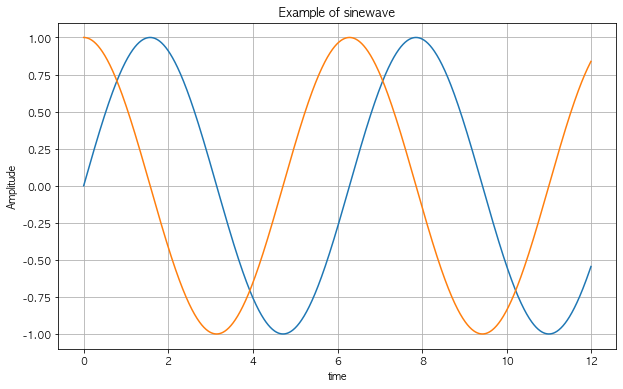

In [114]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

# 1-8 CCTV 현황 그래프로 분석하기

In [115]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

rc('font', family='AppleGothic')

In [116]:
platform.system()

'Darwin'

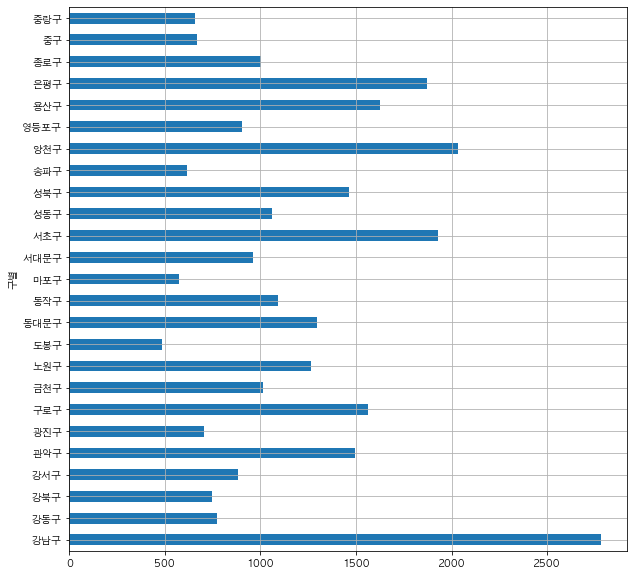

In [117]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

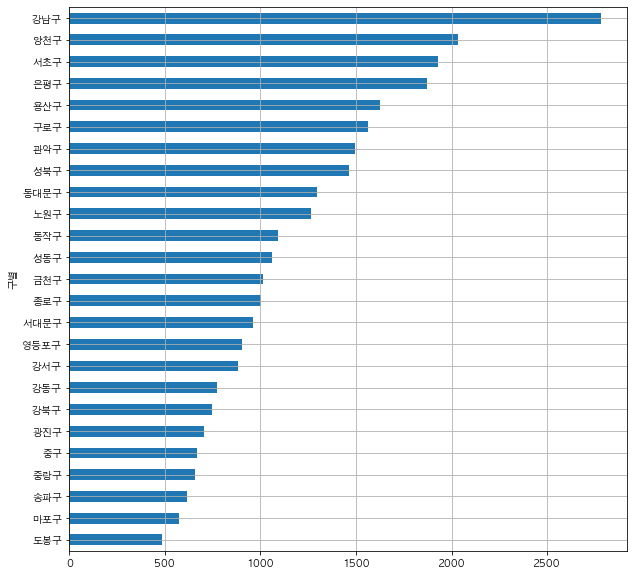

In [118]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

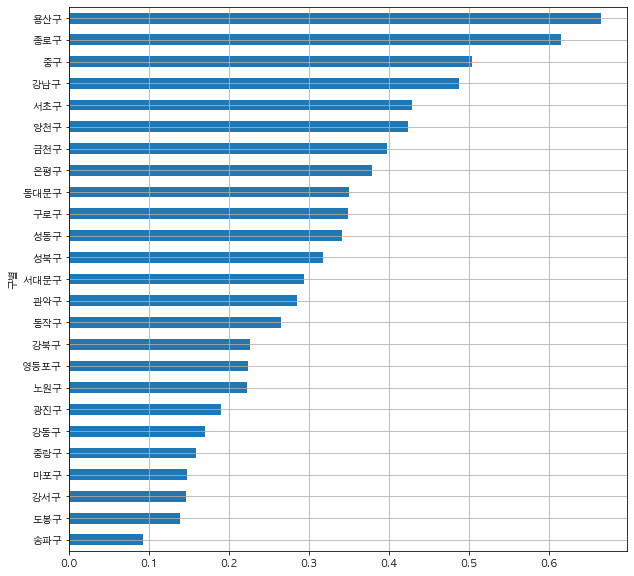

In [119]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

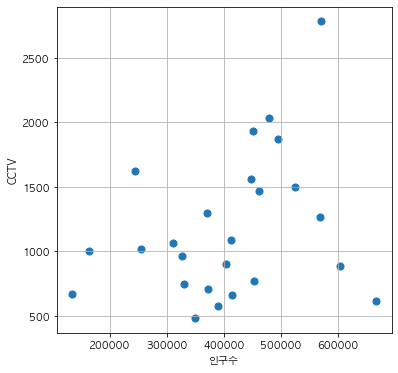

In [120]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [121]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

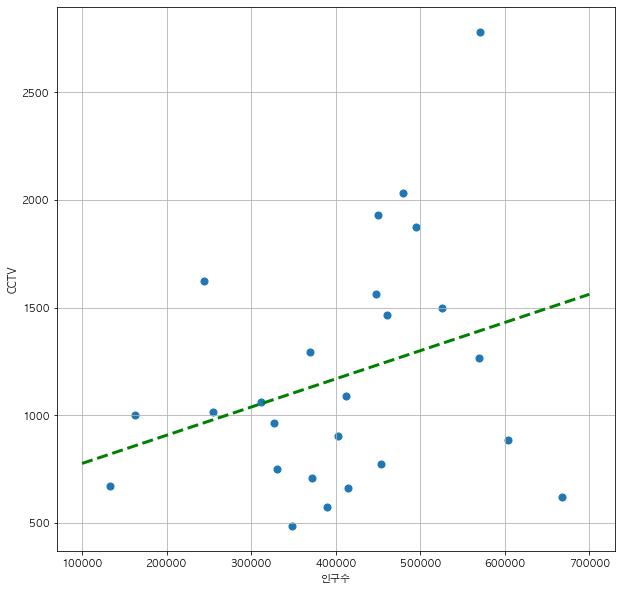

In [122]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [123]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

# 이 부분은 분석 내지는 통계를 이해해야 함
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


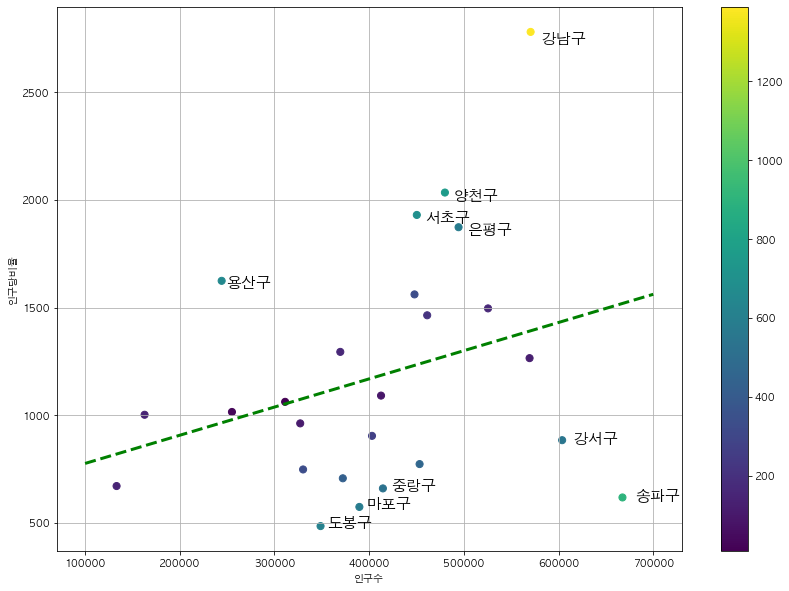

In [130]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

In [125]:
np.abs(data_result['소계'])

구별
강남구     2780
강동구      773
강북구      748
강서구      884
관악구     1496
광진구      707
구로구     1561
금천구     1015
노원구     1265
도봉구      485
동대문구    1294
동작구     1091
마포구      574
서대문구     962
서초구     1930
성동구     1062
성북구     1464
송파구      618
양천구     2034
영등포구     904
용산구     1624
은평구     1873
종로구     1002
중구       671
중랑구      660
Name: 소계, dtype: int64

In [126]:
f1(data_result['인구수'])

array([1391.94464487, 1238.42289235, 1077.34202601, 1435.50315451,
       1333.05189553, 1132.29026377, 1231.40708166,  979.01070661,
       1390.48361768, 1101.50134126, 1128.79741381, 1185.12289226,
       1155.18099895, 1073.3765678 , 1234.59620553, 1052.53598367,
       1248.93155299, 1518.91131175, 1273.43648757, 1172.64001207,
        964.76830981, 1292.30154299,  858.22460369,  819.4995281 ,
       1187.71896477])

In [127]:
data_result['인구수']

구별
강남구     570500.0
강동구     453233.0
강북구     330192.0
강서구     603772.0
관악구     525515.0
광진구     372164.0
구로구     447874.0
금천구     255082.0
노원구     569384.0
도봉구     348646.0
동대문구    369496.0
동작구     412520.0
마포구     389649.0
서대문구    327163.0
서초구     450310.0
성동구     311244.0
성북구     461260.0
송파구     667483.0
양천구     479978.0
영등포구    402985.0
용산구     244203.0
은평구     494388.0
종로구     162820.0
중구      133240.0
중랑구     414503.0
Name: 인구수, dtype: float64